# Module learning pathway:
- Machine Learning
    1. Supervised Learning
    ----------------------------
       1.1. Linear Regression (** TODAY: Gradient Descent **)
       1.2. Logistic Regression
       1.3. Decision Trees and Random Forests
       1.4. K-Nearest Neighbors
       1.5. Support Vector Machines
    2. Unsupervised Learning
    ----------------------------
       2.1. Clustering i.e., K-means clustering
       2.2. Dimensionality Reduction i.e., Principal Component Analysis
       2.3. Anomaly Detection 
    3. Recommender Systems
    ----------------------------
       3.1. Collaborative Filtering
       3.2. Content Based Filtering
    4. Reinforcement Learning
    ----------------------------
       4.1. Reinforcement Learning, Part 1
       4.2. Reinforcement Learning, Part 2


### Task 1. Linear Regression

###  Objectives
1. Define a Linear Regression Task
2. Make a random predictor (price_pred_rand)
3. Visualize the PDFs (price_PDF, price_pred_rand_PDF)
4. Find the dissimilarity measure of the PDFs i.e., KL Divergence(price_PDF, price_pred_rand_PDF)
5. Concept of cost function
6. Visualize the cost function 
7. Use gradient descent to minimize the cost function. 
8. Make a learned predictor (price_pred_learned)
9. Visualize the PDFs and compute KL Divergence (price_PDF, price_pred_learned_PDF, KL Divergence(price_PDF, price_pred_learned_PDF)
10. Discuss the output PDFs and KL Divergence


### Import Library

In [59]:
import pandas as pd
import numpy as np  
import seaborn as sns
from scipy.stats import entropy
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib notebook 

# Magic Command for interactive plotting within the notebook. 
# This allows you to create plots that are embedded directly in the notebook and can be zoomed, panned, and otherwise interacted with.


### Dataset Load

In [60]:
housing_dataset = pd.read_csv('../Datasets/housing.csv')

In [61]:
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [62]:
housing_dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [63]:
housing_dataset = housing_dataset[['area','price']]

In [64]:
housing_dataset.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


# Standardize Dataset

In [65]:
mean = np.array(housing_dataset.mean())
std = np.array(housing_dataset.std())
print(mean)
print(std)

housing_dataset = (housing_dataset - mean)/ std
housing_dataset.head()


[   5150.5412844  4766729.24770642]
[   2170.14102251 1870439.61565739]


,area,price
0,1.045766,4.562174
1,1.755397,4.000809
2,2.216196,4.000809
3,1.082630,3.982096
4,1.045766,3.551716


# Area and Price relation

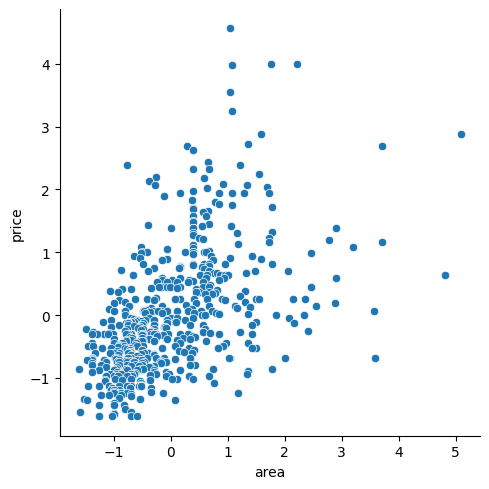

In [66]:
%matplotlib inline 
# display plots in the notebook


sns.relplot(
    data=housing_dataset,  
    x='area', 
    y='price',
)


Equation of a line: y = mx + b

m is a slop

b is bias

Lets define our problem: price = m * area + b or y   = w * x + b

w is called a weight

b is called a bias

x is an input variable

y is an output variable

w, b are parameters/ coefficient

Have to fine best  w, b to fit our data



# Random House Price Predictor

w is weight, a real number

b is a bias, a real number

w, b are called parameters.

X is feature

y_pred = X * w  + b


In [67]:
def get_house_price(x,w,b):
    y_pred =  x * w + b
    return  y_pred

In [68]:
w = np.random.randint(100,200)
b = np.random.randint(100,200)

x = housing_dataset.iloc[0]['area']
y_true =  housing_dataset.iloc[0]['price']
y_pred = get_house_price(x,w,b)

print(x, w, b,  y_true, y_pred)


1.0457655479793244 154 175 4.562173876591275 336.04789438881596


[x1, x2, x3, ..., xn] * w + b 

[x1 * w, x2 * w, ..., xn * w] + b

[x1 * w + b, x2 * w + b, ..., xn * w + b]

[y_pred1, y_pred2, ....y_predn]

In [69]:
housing_dataset["price_pred_rand"] = get_house_price(housing_dataset["area"], w, b)
housing_dataset.head()

,area,price,price_pred_rand
0,1.045766,4.562174,336.047894
1,1.755397,4.000809,445.331115
2,2.216196,4.000809,516.294245
3,1.082630,3.982096,341.724945
4,1.045766,3.551716,336.047894
